In [1]:
import os
from dotenv import load_dotenv
load_dotenv()

os.environ["GROQ_API_KEY"]= os.getenv("GROQ_API_KEY")
os.environ['HF_API_KEY']=os.getenv("HF_API_KEY")


In [2]:
from langchain_community.document_loaders import WebBaseLoader
from langchain_community.vectorstores import FAISS
from langchain_huggingface import HuggingFaceEmbeddings
from langchain_text_splitters import RecursiveCharacterTextSplitter
#HuggingFaceEmbeddings(model_name='all-MiniLM-L6-v2')

USER_AGENT environment variable not set, consider setting it to identify your requests.


In [3]:
urls =[
    "https://huggingface.co/learn/agents-course/unit3/agentic-rag/introduction",
    "https://huggingface.co/learn/agents-course/unit3/agentic-rag/agentic-rag",
    "https://huggingface.co/learn/agents-course/unit3/agentic-rag/tools",
    "https://huggingface.co/learn/agents-course/unit3/agentic-rag/agent",
    "https://huggingface.co/learn/agents-course/unit3/agentic-rag/conclusion"
]

docs = [WebBaseLoader(url).load() for url in urls]
docs

[[Document(metadata={'source': 'https://huggingface.co/learn/agents-course/unit3/agentic-rag/introduction', 'title': 'Introduction to Use Case for Agentic RAG - Hugging Face Agents Course', 'description': 'We’re on a journey to advance and democratize artificial intelligence through open source and open science.', 'language': 'No language found.'}, page_content="\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nIntroduction to Use Case for Agentic RAG - Hugging Face Agents Course\n\n\n\n\n\n\n\n\nHugging Face\n\n\n\n\n\n\n\n\t\t\t\t\t\tModels\n\n\t\t\t\t\t\tDatasets\n\n\t\t\t\t\t\tSpaces\n\n\n\n\t\t\tCommunity\n\t\t\n\n\n\t\t\t\t\t\tDocs\n\n\t\t\t\t\t\tEnterprise\n\nPricing\n\t\t\t\n\n\n\n\n\n\nLog In\n\t\t\t\t\nSign Up\n\t\t\t\t\t\n\n\n\nAgents Course documentation\n\t\t\t\nIntroduction to Use Case for Agentic RAG\n\n\n\nAgents Course\n\n🏡 View all resourcesAgents CourseAudio CourseCommunity Computer Vision CourseDeep RL CourseDiffusion CourseLLM CourseMCP CourseML for 3D Cour

In [4]:
doc_list = [item for sublist in docs for item in sublist]

text_splitter = RecursiveCharacterTextSplitter(chunk_size = 1000,chunk_overlap=100)
doc_splits = text_splitter.split_documents(doc_list)


In [5]:
embeddings=HuggingFaceEmbeddings(model_name='all-MiniLM-L6-v2')

/Users/jyo/Desktop/Projects/KN_Agents/.venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
vectorstore = FAISS.from_documents(
    documents=doc_splits,
    embedding=embeddings,

)

retriever = vectorstore.as_retriever()

/Users/jyo/Desktop/Projects/KN_Agents/.venv/lib/python3.13/site-packages/torch/nn/modules/module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


In [7]:
retriever.invoke("What is the role of RAG in Agentic AI? Why is it used and it's benefits over traditional RAG?")

/Users/jyo/Desktop/Projects/KN_Agents/.venv/lib/python3.13/site-packages/torch/nn/modules/module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


[Document(id='d3a8ad5a-853a-4afe-a353-7471f399f1d0', metadata={'source': 'https://huggingface.co/learn/agents-course/unit3/agentic-rag/agentic-rag', 'title': 'Agentic Retrieval Augmented Generation (RAG) - Hugging Face Agents Course', 'description': 'We’re on a journey to advance and democratize artificial intelligence through open source and open science.', 'language': 'No language found.'}, page_content='←Introduction to Use Case for Agentic RAG\nCreating a RAG Tool for Guest Stories→\n\n\nAgentic Retrieval Augmented Generation (RAG)'),
 Document(id='3d7abbf2-8b11-4417-bfe9-acc8863f4c74', metadata={'source': 'https://huggingface.co/learn/agents-course/unit3/agentic-rag/conclusion', 'title': 'Conclusion - Hugging Face Agents Course', 'description': 'We’re on a journey to advance and democratize artificial intelligence through open source and open science.', 'language': 'No language found.'}, page_content='Creating more specialized tools for your own use cases Implementing more sophist

In [8]:
from langchain.tools.retriever import create_retriever_tool
retriever_tool = create_retriever_tool(
    retriever,
    "retriever_df_RAG_blog",
    "Search and run information about RAG in Agentic AI"
)
retriever_tool

Tool(name='retriever_df_RAG_blog', description='Search and run information about RAG in Agentic AI', args_schema=<class 'langchain_core.tools.retriever.RetrieverInput'>, func=functools.partial(<function _get_relevant_documents at 0x17d34b7e0>, retriever=VectorStoreRetriever(tags=['FAISS', 'HuggingFaceEmbeddings'], vectorstore=<langchain_community.vectorstores.faiss.FAISS object at 0x165e92e40>, search_kwargs={}), document_prompt=PromptTemplate(input_variables=['page_content'], input_types={}, partial_variables={}, template='{page_content}'), document_separator='\n\n', response_format='content'), coroutine=functools.partial(<function _aget_relevant_documents at 0x166140e00>, retriever=VectorStoreRetriever(tags=['FAISS', 'HuggingFaceEmbeddings'], vectorstore=<langchain_community.vectorstores.faiss.FAISS object at 0x165e92e40>, search_kwargs={}), document_prompt=PromptTemplate(input_variables=['page_content'], input_types={}, partial_variables={}, template='{page_content}'), document_sepa

In [9]:
smol_urls =[
    "https://huggingface.co/learn/agents-course/unit2/smolagents/introduction",
    "https://huggingface.co/learn/agents-course/unit2/smolagents/code_agents",
    "https://huggingface.co/learn/agents-course/unit2/smolagents/tool_calling_agents",
    "https://huggingface.co/learn/agents-course/unit2/smolagents/tools",
    "https://huggingface.co/learn/agents-course/unit2/smolagents/retrieval_agents",
    "https://huggingface.co/learn/agents-course/unit2/smolagents/multi_agent_systems",
    "https://huggingface.co/learn/agents-course/unit2/smolagents/vision_agents"
]

docs = [WebBaseLoader(url).load() for url in urls]
docs

[[Document(metadata={'source': 'https://huggingface.co/learn/agents-course/unit3/agentic-rag/introduction', 'title': 'Introduction to Use Case for Agentic RAG - Hugging Face Agents Course', 'description': 'We’re on a journey to advance and democratize artificial intelligence through open source and open science.', 'language': 'No language found.'}, page_content="\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nIntroduction to Use Case for Agentic RAG - Hugging Face Agents Course\n\n\n\n\n\n\n\n\nHugging Face\n\n\n\n\n\n\n\n\t\t\t\t\t\tModels\n\n\t\t\t\t\t\tDatasets\n\n\t\t\t\t\t\tSpaces\n\n\n\n\t\t\tCommunity\n\t\t\n\n\n\t\t\t\t\t\tDocs\n\n\t\t\t\t\t\tEnterprise\n\nPricing\n\t\t\t\n\n\n\n\n\n\nLog In\n\t\t\t\t\nSign Up\n\t\t\t\t\t\n\n\n\nAgents Course documentation\n\t\t\t\nIntroduction to Use Case for Agentic RAG\n\n\n\nAgents Course\n\n🏡 View all resourcesAgents CourseAudio CourseCommunity Computer Vision CourseDeep RL CourseDiffusion CourseLLM CourseMCP CourseML for 3D Cour

In [10]:
doc_list = [item for sublist in docs for item in sublist]

text_splitter = RecursiveCharacterTextSplitter(chunk_size = 1000,chunk_overlap=100)
doc_splits = text_splitter.split_documents(doc_list)

vectorstore_smol = FAISS.from_documents(
    documents=doc_splits,
    embedding=embeddings,

)

retriever_smol = vectorstore_smol.as_retriever()

In [11]:
from langchain.tools.retriever import create_retriever_tool
retriever_tools_smol = create_retriever_tool(
    retriever_smol,
    "retriever_df_smolagents_blog",
    "Search and run information about smolagents"
)
retriever_tools_smol

Tool(name='retriever_df_smolagents_blog', description='Search and run information about smolagents', args_schema=<class 'langchain_core.tools.retriever.RetrieverInput'>, func=functools.partial(<function _get_relevant_documents at 0x17d34b7e0>, retriever=VectorStoreRetriever(tags=['FAISS', 'HuggingFaceEmbeddings'], vectorstore=<langchain_community.vectorstores.faiss.FAISS object at 0x17d04c550>, search_kwargs={}), document_prompt=PromptTemplate(input_variables=['page_content'], input_types={}, partial_variables={}, template='{page_content}'), document_separator='\n\n', response_format='content'), coroutine=functools.partial(<function _aget_relevant_documents at 0x166140e00>, retriever=VectorStoreRetriever(tags=['FAISS', 'HuggingFaceEmbeddings'], vectorstore=<langchain_community.vectorstores.faiss.FAISS object at 0x17d04c550>, search_kwargs={}), document_prompt=PromptTemplate(input_variables=['page_content'], input_types={}, partial_variables={}, template='{page_content}'), document_sepa

In [12]:
llama_urls =[
    "https://huggingface.co/learn/agents-course/unit2/llama-index/introduction",
    "https://huggingface.co/learn/agents-course/unit2/llama-index/llama-hub",
    "https://huggingface.co/learn/agents-course/unit2/llama-index/components",
    "https://huggingface.co/learn/agents-course/unit2/llama-index/tools",
    "https://huggingface.co/learn/agents-course/unit2/llama-index/agents",
    "https://huggingface.co/learn/agents-course/unit2/llama-index/workflows",
    "https://huggingface.co/learn/agents-course/unit2/llama-index/conclusion"
]

docs = [WebBaseLoader(url).load() for url in urls]
docs

[[Document(metadata={'source': 'https://huggingface.co/learn/agents-course/unit3/agentic-rag/introduction', 'title': 'Introduction to Use Case for Agentic RAG - Hugging Face Agents Course', 'description': 'We’re on a journey to advance and democratize artificial intelligence through open source and open science.', 'language': 'No language found.'}, page_content="\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nIntroduction to Use Case for Agentic RAG - Hugging Face Agents Course\n\n\n\n\n\n\n\n\nHugging Face\n\n\n\n\n\n\n\n\t\t\t\t\t\tModels\n\n\t\t\t\t\t\tDatasets\n\n\t\t\t\t\t\tSpaces\n\n\n\n\t\t\tCommunity\n\t\t\n\n\n\t\t\t\t\t\tDocs\n\n\t\t\t\t\t\tEnterprise\n\nPricing\n\t\t\t\n\n\n\n\n\n\nLog In\n\t\t\t\t\nSign Up\n\t\t\t\t\t\n\n\n\nAgents Course documentation\n\t\t\t\nIntroduction to Use Case for Agentic RAG\n\n\n\nAgents Course\n\n🏡 View all resourcesAgents CourseAudio CourseCommunity Computer Vision CourseDeep RL CourseDiffusion CourseLLM CourseMCP CourseML for 3D Cour

In [13]:
doc_list = [item for sublist in docs for item in sublist]

text_splitter = RecursiveCharacterTextSplitter(chunk_size = 1000,chunk_overlap=100)
doc_splits = text_splitter.split_documents(doc_list)

vectorstore_llama = FAISS.from_documents(
    documents=doc_splits,
    embedding=embeddings,

)

retriever_llama = vectorstore_llama.as_retriever()

In [14]:
from langchain.tools.retriever import create_retriever_tool
retriever_tools_smol = create_retriever_tool(
    retriever_smol,
    "retriever_df_smolagents_blog",
    "Search and run information about smolagents"
)
retriever_tools_smol

Tool(name='retriever_df_smolagents_blog', description='Search and run information about smolagents', args_schema=<class 'langchain_core.tools.retriever.RetrieverInput'>, func=functools.partial(<function _get_relevant_documents at 0x17d34b7e0>, retriever=VectorStoreRetriever(tags=['FAISS', 'HuggingFaceEmbeddings'], vectorstore=<langchain_community.vectorstores.faiss.FAISS object at 0x17d04c550>, search_kwargs={}), document_prompt=PromptTemplate(input_variables=['page_content'], input_types={}, partial_variables={}, template='{page_content}'), document_separator='\n\n', response_format='content'), coroutine=functools.partial(<function _aget_relevant_documents at 0x166140e00>, retriever=VectorStoreRetriever(tags=['FAISS', 'HuggingFaceEmbeddings'], vectorstore=<langchain_community.vectorstores.faiss.FAISS object at 0x17d04c550>, search_kwargs={}), document_prompt=PromptTemplate(input_variables=['page_content'], input_types={}, partial_variables={}, template='{page_content}'), document_sepa

In [15]:
from langchain.tools.retriever import create_retriever_tool
retriever_tools_llama = create_retriever_tool(
    retriever_llama,
    "retriever_df_llamaindex_blog",
    "Search and run information about llamaindex"
)
retriever_tools_llama

Tool(name='retriever_df_llamaindex_blog', description='Search and run information about llamaindex', args_schema=<class 'langchain_core.tools.retriever.RetrieverInput'>, func=functools.partial(<function _get_relevant_documents at 0x17d34b7e0>, retriever=VectorStoreRetriever(tags=['FAISS', 'HuggingFaceEmbeddings'], vectorstore=<langchain_community.vectorstores.faiss.FAISS object at 0x17d04d450>, search_kwargs={}), document_prompt=PromptTemplate(input_variables=['page_content'], input_types={}, partial_variables={}, template='{page_content}'), document_separator='\n\n', response_format='content'), coroutine=functools.partial(<function _aget_relevant_documents at 0x166140e00>, retriever=VectorStoreRetriever(tags=['FAISS', 'HuggingFaceEmbeddings'], vectorstore=<langchain_community.vectorstores.faiss.FAISS object at 0x17d04d450>, search_kwargs={}), document_prompt=PromptTemplate(input_variables=['page_content'], input_types={}, partial_variables={}, template='{page_content}'), document_sepa

In [16]:
graph_urls =[
    "https://huggingface.co/learn/agents-course/unit2/langgraph/introduction",
    "https://huggingface.co/learn/agents-course/unit2/langgraph/when_to_use_langgraph",
    "https://huggingface.co/learn/agents-course/unit2/langgraph/building_blocks",
    "https://huggingface.co/learn/agents-course/unit2/langgraph/first_graph",
    "https://huggingface.co/learn/agents-course/unit2/langgraph/document_analysis_agent",
    "https://huggingface.co/learn/agents-course/unit2/langgraph/conclusion"
]

docs = [WebBaseLoader(url).load() for url in urls]
docs

[[Document(metadata={'source': 'https://huggingface.co/learn/agents-course/unit3/agentic-rag/introduction', 'title': 'Introduction to Use Case for Agentic RAG - Hugging Face Agents Course', 'description': 'We’re on a journey to advance and democratize artificial intelligence through open source and open science.', 'language': 'No language found.'}, page_content="\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nIntroduction to Use Case for Agentic RAG - Hugging Face Agents Course\n\n\n\n\n\n\n\n\nHugging Face\n\n\n\n\n\n\n\n\t\t\t\t\t\tModels\n\n\t\t\t\t\t\tDatasets\n\n\t\t\t\t\t\tSpaces\n\n\n\n\t\t\tCommunity\n\t\t\n\n\n\t\t\t\t\t\tDocs\n\n\t\t\t\t\t\tEnterprise\n\nPricing\n\t\t\t\n\n\n\n\n\n\nLog In\n\t\t\t\t\nSign Up\n\t\t\t\t\t\n\n\n\nAgents Course documentation\n\t\t\t\nIntroduction to Use Case for Agentic RAG\n\n\n\nAgents Course\n\n🏡 View all resourcesAgents CourseAudio CourseCommunity Computer Vision CourseDeep RL CourseDiffusion CourseLLM CourseMCP CourseML for 3D Cour

In [17]:
doc_list = [item for sublist in docs for item in sublist]

text_splitter = RecursiveCharacterTextSplitter(chunk_size = 1000,chunk_overlap=100)
doc_splits = text_splitter.split_documents(doc_list)

vectorstore_graph = FAISS.from_documents(
    documents=doc_splits,
    embedding=embeddings,

)

retriever_graph= vectorstore_graph.as_retriever()

In [18]:
from langchain.tools.retriever import create_retriever_tool
retriever_tools_graph= create_retriever_tool(
    retriever_graph,
    "retriever_df_langgraph_blog",
    "Search and run information about langgraph"
)
retriever_tools_graph

Tool(name='retriever_df_langgraph_blog', description='Search and run information about langgraph', args_schema=<class 'langchain_core.tools.retriever.RetrieverInput'>, func=functools.partial(<function _get_relevant_documents at 0x17d34b7e0>, retriever=VectorStoreRetriever(tags=['FAISS', 'HuggingFaceEmbeddings'], vectorstore=<langchain_community.vectorstores.faiss.FAISS object at 0x17d000510>, search_kwargs={}), document_prompt=PromptTemplate(input_variables=['page_content'], input_types={}, partial_variables={}, template='{page_content}'), document_separator='\n\n', response_format='content'), coroutine=functools.partial(<function _aget_relevant_documents at 0x166140e00>, retriever=VectorStoreRetriever(tags=['FAISS', 'HuggingFaceEmbeddings'], vectorstore=<langchain_community.vectorstores.faiss.FAISS object at 0x17d000510>, search_kwargs={}), document_prompt=PromptTemplate(input_variables=['page_content'], input_types={}, partial_variables={}, template='{page_content}'), document_separa

In [19]:
tools=[retriever,retriever_smol,retriever_llama,retriever_graph]

## LangGraph Workflow

In [20]:
from typing import Annotated, Sequence
from typing_extensions import TypedDict

from langchain_core.messages import BaseMessage

from langgraph.graph.message import add_messages

class AgentState(TypedDict):
     # The add_messages function defines how an update should be processed
    # Default is to replace. add_messages says "append"
    messages: Annotated[Sequence[BaseMessage], add_messages]

In [21]:
from langchain_groq import ChatGroq

model = ChatGroq(model_name="Openai/Gpt-Oss-120b")
model

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x17e723b60>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x178b1c830>, model_name='Openai/Gpt-Oss-120b', model_kwargs={}, groq_api_key=SecretStr('**********'))

In [22]:
def agent(state):
    """
    Invokes the agent model to generate a response based on the current state. Given
    the question, it will decide to retrieve using the retriever tool, or simply end.

    Args:
        state (messages): The current state

    Returns:
        dict: The updated state with the agent response appended to messages
    """
    print("---CALL AGENT---")
    messages = state["messages"]
    model = ChatGroq(model="Openai/Gpt-Oss-120b")
    model = model.bind_tools(tools)
    response = model.invoke(messages)
    # We return a list, because this will get added to the existing list
    return {"messages": [response]}

In [23]:
from langchain import hub
from langchain_core.messages import BaseMessage, HumanMessage
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import PromptTemplate
from langchain_groq import ChatGroq

from typing import Annotated, Literal, Sequence
from typing_extensions import TypedDict

from pydantic import BaseModel, Field

In [24]:
### Edges
def grade_documents(state) -> Literal["generate", "rewrite"]:
    """
    Determines whether the retrieved documents are relevant to the question.

    Args:
        state (messages): The current state

    Returns:
        str: A decision for whether the documents are relevant or not
    """

    print("---CHECK RELEVANCE---")

    # Data model
    class grade(BaseModel):
        """Binary score for relevance check."""

        binary_score: str = Field(description="Relevance score 'yes' or 'no'")

    # LLM
    model = ChatGroq(model="Openai/Gpt-Oss-120b")

    # LLM with tool and validation
    model_with_tool = model.with_structured_output(grade)

    # Prompt
    prompt = PromptTemplate(
        template="""You are a grader assessing relevance of a retrieved document to a user question. \n 
        Here is the retrieved document: \n\n {context} \n\n
        Here is the user question: {question} \n
        If the document contains keyword(s) or semantic meaning related to the user question, grade it as relevant. \n
        Give a binary score 'yes' or 'no' score to indicate whether the document is relevant to the question.""",
        input_variables=["context", "question"],
    )

    # Chain
    chain = prompt | model_with_tool

    messages = state["messages"]
    last_message = messages[-1]

    question = messages[0].content
    docs = last_message.content

    scored_result = chain.invoke({"question": question, "context": docs})

    score = scored_result.binary_score

    if score == "yes":
        print("---DECISION: DOCS RELEVANT---")
        return "generate"

    else:
        print("---DECISION: DOCS NOT RELEVANT---")
        print(score)
        return "rewrite"

In [25]:
def generate(state):
    """
    Generate answer

    Args:
        state (messages): The current state

    Returns:
         dict: The updated message
    """
    print("---GENERATE---")
    messages = state["messages"]
    question = messages[0].content
    last_message = messages[-1]

    docs = last_message.content

    # Prompt
    prompt = hub.pull("rlm/rag-prompt")

    # Post-processing
    def format_docs(docs):
        return "\n\n".join(doc.page_content for doc in docs)

    # Chain
    rag_chain = prompt | model | StrOutputParser()

    # Run
    response = rag_chain.invoke({"context": docs, "question": question})
    return {"messages": [response]}

In [26]:
def rewrite(state):
    """
    Transform the query to produce a better question.

    Args:
        state (messages): The current state

    Returns:
        dict: The updated state with re-phrased question
    """

    print("---TRANSFORM QUERY---")
    messages = state["messages"]
    question = messages[0].content

    msg = [
        HumanMessage(
            content=f""" \n 
    Look at the input and try to reason about the underlying semantic intent / meaning. \n 
    Here is the initial question:
    \n ------- \n
    {question} 
    \n ------- \n
    Formulate an improved question: """,
        )
    ]

    # Grader
    response = model.invoke(msg)
    return {"messages": [response]}

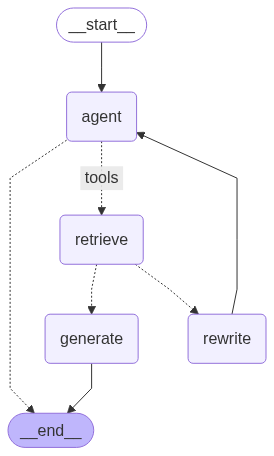

In [27]:
from langgraph.graph import END, StateGraph, START
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition

# Define a new graph
workflow = StateGraph(AgentState)

# Define the nodes we will cycle between
workflow.add_node("agent", agent)  # agent
retrieve = ToolNode([retriever_tool,retriever_tools_smol, retriever_tools_llama, retriever_tools_graph])
workflow.add_node("retrieve", retrieve)  # retrieval
workflow.add_node("rewrite", rewrite)  # Re-writing the question
workflow.add_node(
    "generate", generate
)  # Generating a response after we know the documents are relevant
# Call agent node to decide to retrieve or not
workflow.add_edge(START, "agent")

# Decide whether to retrieve
workflow.add_conditional_edges(
    "agent",
    # Assess agent decision
    tools_condition,
    {
        # Translate the condition outputs to nodes in our graph
        "tools": "retrieve",
        END: END,
    },
)

# Edges taken after the `action` node is called.
workflow.add_conditional_edges(
    "retrieve",
    # Assess agent decision
    grade_documents,
)
workflow.add_edge("generate", END)
workflow.add_edge("rewrite", "agent")

# Compile
graph = workflow.compile()
from IPython.display import Image, display
display(Image(graph.get_graph(xray=True).draw_mermaid_png()))


In [29]:
graph.invoke({"messages": "What is smolagents?"})

---CALL AGENT---


ValueError: Unsupported function

tags=['FAISS', 'HuggingFaceEmbeddings'] vectorstore=<langchain_community.vectorstores.faiss.FAISS object at 0x165e92e40> search_kwargs={}

Functions must be passed in as Dict, pydantic.BaseModel, or Callable. If they're a dict they must either be in OpenAI function format or valid JSON schema with top-level 'title' and 'description' keys.